In [1]:
%matplotlib inline

In [2]:
import random
import time
import copy

import numpy as np
import numpy.core.defchararray as npstr
import matplotlib.pyplot as plt

In [3]:
def generateWord(length):
    abc = 'abcdefghijklmnopqrstuvwxyz'
    word = ''
    for i in range(length):
        word += random.choice(abc)
    return word

def generateLengths(count,mean, dist, showGraph = False):
    s = np.random.normal(mean, dist, count)
    s = np.round(s,0).astype(int)
    lessThanOne = s < 1
    s[lessThanOne] = 1
    if showGraph:
        count, bins, ignored = plt.hist(s, 30, normed=True)
        plt.show()
    return s

def generateDictionary(count):
    currentDict = []
    wordLengths = generateLengths(count,5,1)
    for length in wordLengths:
        oldLen = len(currentDict)
        while(len(currentDict) == oldLen):
            word = generateWord(length)
            if word not in currentDict:
                currentDict.append(word)  
    return currentDict

def generateComments(count,dictionary,mean,dist,showGraph = False):
    comments = []
    lengths = generateLengths(count,mean,dist,showGraph) 
    for length in lengths:
        comment = ''
        for i in range(length):
            comment += random.choice(dictionary) + ' '
        comments.append(comment.rstrip())
    return np.asarray(comments)

In [4]:

generateWord(3)

'anv'

In [5]:
random.seed(50)
np.random.seed(12)
generateLengths(10,5,1)

array([5, 4, 5, 3, 6, 3, 5, 5, 4, 8])

In [6]:
random.seed(50)
np.random.seed(15)
d = generateDictionary(20)
d

['piluh',
 'wpykc',
 'rkhvr',
 'celd',
 'lkhgc',
 'ktt',
 'nucc',
 'wtkz',
 'wunah',
 'kiznw',
 'dgoiw',
 'soeit',
 'grsdnv',
 'twduz',
 'rpnq',
 'rvepsq',
 'jclyq',
 'ealasvn',
 'pzurzh',
 'fxsde']

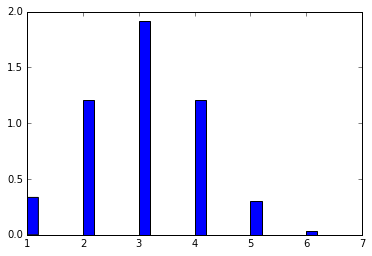

array(['wtkz rvepsq dgoiw', 'rkhvr ealasvn dgoiw', 'wtkz ealasvn',
       'rkhvr lkhgc soeit'], 
      dtype='<U47')

In [30]:
random.seed(50)
np.random.seed(15)
comments = generateComments(1000000,d,3,1,True)
comments[1:5]

# Finding word pairs using string comparision

In [36]:
def findCommentsWithWords(comments,words):
    currentVocab = copy.deepcopy(comments)
    for w in words:
        currentVocab = currentVocab[(npstr.find(currentVocab, w) != -1)]
    return currentVocab

def numberOfMatches(comments, words):
    result = findCommentsWithWords(comments,words )
    #print(result)
    return len(result)
    

In [44]:
start = time.time()
print(numberOfMatches(comments, ['ealasvn']))
end = time.time()
print(str(end - start)+' seconds')

141150
1.0348551273345947 seconds


# Finding word paris using prime factorisation

### Step 1. Preprocessing
To begin we need to assign each unque word in your dictionary with a unique prime number